## Installing and Importing packages

In [0]:
!python --version

Python 3.6.9


In [1]:
#upgrading the tensor flow to version 2.1.0
!pip install tensorflow==2.1.0


     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 41.1MB/s 
     |████████████████████████████████| 3.9MB 34.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=aaff57352194d93c52b7a4ea365b537b2774913ba427d806c38d86113f8e6c3f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [2]:
 #Importing and checking tensorflow version
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
#Loading required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Conv2D,GlobalMaxPooling2D,MaxPooling2D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pickle

## Loading the 1270 pictures and their labels and preprocessing

In [0]:
# Downloading data and converting the path string to Path
data_dir=tf.keras.utils.get_file(origin='http://up.iranblog.com/uploads/Jewellery_8c345.zip',
                        fname='jewellery',
                        extract=True)
data_dir = pathlib.Path(data_dir)

In [0]:
data_dir

PosixPath('/root/.keras/datasets/jewellery')

In [0]:
#Counting total number of images
image_count = len(list(data_dir.parent.glob('Jewellery/*/*.jpg')))
image_count

1270

In [0]:
# The class names which are also the name of each folder that images are in
class_names = np.array([item.name for item in data_dir.parent.glob('Jewellery/*')])
class_names

array(['ring', 'bracelet', 'earring', 'necklace'], dtype='<U8')

In [0]:
x=[]
y=[]
for i in (data_dir.parent.glob('Jewellery/*/*.jpg')):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  c=i.parent.parts[-1]
  x.append(b)
  y.append(c)
x=np.array(x)
y=np.array(y)  

In [0]:
x.shape

(1270, 200, 200, 3)

In [0]:
y.shape

(1270,)

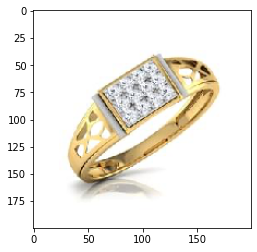

In [0]:
plt.imshow(x[0])

In [0]:
y[0]

'ring'

In [0]:
# Encoding the y labels
le=LabelEncoder()
y=le.fit_transform(y)

In [0]:
le.classes_

array(['bracelet', 'earring', 'necklace', 'ring'], dtype='<U8')

In [0]:
y[0]

3

In [0]:
# Dividing the original data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [0]:
# Deviding the train data into the train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.125,random_state=42)


In [0]:
x_train.shape

(889, 200, 200, 3)

In [0]:
y_train.shape

(889,)

In [0]:
x_val.shape

(127, 200, 200, 3)

In [0]:
y_val.shape

(127,)

In [0]:
x_test.shape

(254, 200, 200, 3)

In [0]:
y_test.shape

(254,)

## A Simple CNN Model

In [0]:
model1=Sequential()
model1.add(Input(shape=x_train[0].shape))
model1.add(Conv2D(filters=64,kernel_size=5,activation='relu'))
model1.add(Flatten())
model1.add(Dense(4,activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

Train on 889 samples, validate on 127 samples
Epoch 1/20
889/889 [==============================] - 41s 46ms/sample - loss: 53.0503 - accuracy: 0.3870 - val_loss: 1.0882 - val_accuracy: 0.4882
Epoch 2/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.8129 - accuracy: 0.7627 - val_loss: 0.4548 - val_accuracy: 0.8661
Epoch 3/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.7688 - accuracy: 0.8155 - val_loss: 0.7910 - val_accuracy: 0.7953
Epoch 4/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.5237 - accuracy: 0.8751 - val_loss: 0.3354 - val_accuracy: 0.9291
Epoch 5/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.3589 - accuracy: 0.9156 - val_loss: 0.3127 - val_accuracy: 0.9134
Epoch 6/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.1594 - accuracy: 0.9595 - val_loss: 0.2825 - val_accuracy: 0.9055
Epoch 7/20
889/889 [==============================] - 40s 45ms/sample - loss:

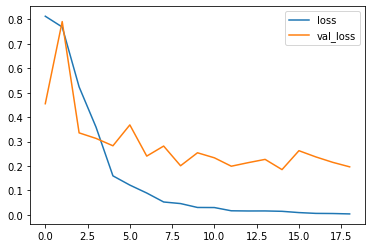

In [0]:
plt.plot(r.history['loss'][1:],label='loss')
plt.plot(r.history['val_loss'][1:],label='val_loss')
plt.legend();

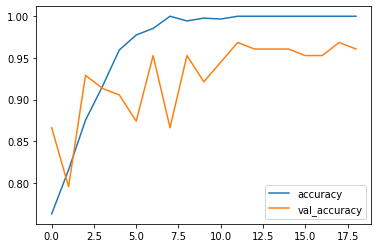

In [0]:
plt.plot(r.history['accuracy'][1:],label='accuracy')
plt.plot(r.history['val_accuracy'][1:],label='val_accuracy')
plt.legend();

In [0]:
# Confusion Matrix
tf.math.confusion_matrix(y_val,model1.predict_classes(x_val))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[23,  0,  1,  1],
       [ 0, 57,  0,  0],
       [ 0,  0, 25,  0],
       [ 1,  1,  1, 17]], dtype=int32)>

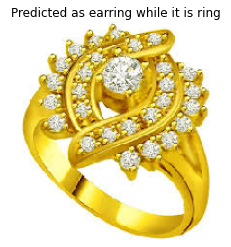

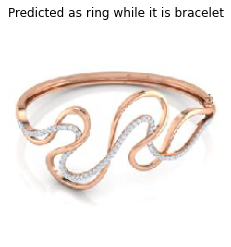

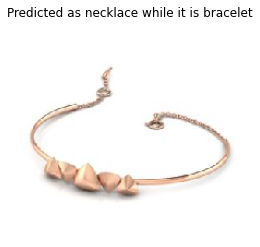

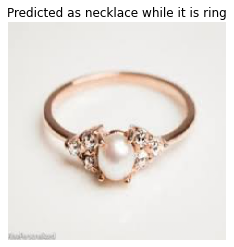

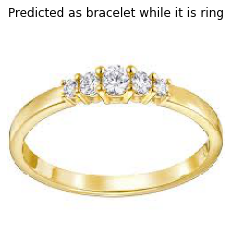

In [0]:
# Dict for encoded labels to the catergories
dict1={0: 'bracelet',
       1: 'earring',
       2: 'necklace',
       3: 'ring'}
# Finding which pictures are missclassified
missclassified=np.where(y_val!=model1.predict_classes(x_val))[0]
counter=0
for fig_number in missclassified:
  plt.imshow(x_val[fig_number])
  plt.title('Predicted as {} while it is {}'.format(dict1[model1.predict_classes(x_val)[fig_number]],dict1[y_val[fig_number]]))
  counter=counter+1
  plt.axis('off')
  plt.show()

In [0]:
# Confusion Matrix for test data
tf.math.confusion_matrix(y_test,model1.predict_classes(x_test))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[65,  3,  3,  0],
       [ 1, 83,  0,  1],
       [ 1,  2, 58,  2],
       [ 0,  1,  1, 33]], dtype=int32)>

In [0]:
# accuracy for test data
m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test,model1.predict_classes(x_test) ) 
m.result().numpy() 

0.9409449

In [0]:
model1.save('jewleery_classification.h5')

In [0]:
#tf.keras.models.load_model('jewleery_classification.h5')

In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 196, 196, 64)      4864      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2458624)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 9834500   
Total params: 9,839,364
Trainable params: 9,839,364
Non-trainable params: 0
_________________________________________________________________


From the above result, we can see that although the result is quite good, but because the number of image is low, our model may not be able to classify the the pictures that are quite different than these ones.

## Adding Much More Pictures and Modelling

More than 13000 new images have been found and added to the original dataset, that we used in the previous sections. Right now, we have more that 14000 images for train,validation and test. In this section, we want to try to develop a new simple model and probably adding more filters and layers.

In [0]:
# Downloading data and converting the path string to Path
# If you received 403 Forbidden error, please start the download manually using download manager manually and immediately cancel that and run this cell again.
large_data_dir=tf.keras.utils.get_file(origin='http://up.iranblog.com/uploads/New-Images.zip',
                        fname='new_images',
                        extract=True)
large_data_dir = pathlib.Path(large_data_dir)

231211008/231205597 [==============================] - 4s 0us/step


In [0]:
large_data_dir

PosixPath('/root/.keras/datasets/new_images')

In [0]:
new_image_count = len(list(large_data_dir.parent.glob('New Images/*/*.jpg')))
new_image_count

14409

In [0]:
class_names = np.array([item.name for item in large_data_dir.parent.glob('New Images/*')])
class_names

array(['ring', 'bracelet', 'necklace', 'earring'], dtype='<U8')

In [0]:
# If you have more memory, please uncomment this cell otherwise run the next cell instead of this.
# x_new=[]
# y_new=[]
# for i in (sorted(large_data_dir.parent.glob('New Images/*/*.jpg'))):
#   b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
#   c=i.parent.parts[-1]
#   x_new.append(b)
#   y_new.append(c)
# x_new=np.array(x_new)
# y_new=np.array(y_new)  

In [0]:
x_new=np.empty(shape=(new_image_count,200,200,3),dtype=np.float16)
y_new=np.empty(shape=(new_image_count,),dtype='U8')
counter=0
for i in (sorted(large_data_dir.parent.glob('New Images/*/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  c=i.parent.parts[-1]
  x_new[counter]=b
  y_new[counter]=c
  counter+=1

In [0]:
x_new.shape

(14409, 200, 200, 3)

In [0]:
y_new.shape

(14409,)

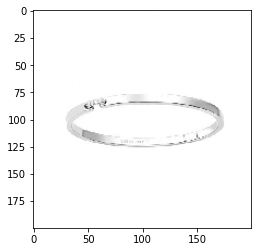

In [0]:
plt.imshow(x_new[0].astype(np.float32))

In [0]:
y_new[0]

'bracelet'

In [0]:
# Encoding the y_new labels
le=LabelEncoder()
y_new=le.fit_transform(y_new)

In [0]:
y_new[0]

0

In [0]:
# Dividing the original data into train and test data
x_new_train,x_new_test,y_new_train,y_new_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [0]:
# Deviding the train data into the train and validation data
x_new_train,x_new_val,y_new_train,y_new_val=train_test_split(x_new_train,y_new_train,test_size=0.125,random_state=42)


In [0]:
x_new_train.shape

(10086, 200, 200, 3)

In [0]:
y_new_train.shape

(10086,)

In [0]:
x_new_val.shape

(1441, 200, 200, 3)

In [0]:
y_new_val.shape

(1441,)

In [0]:
x_new_test.shape

(2882, 200, 200, 3)

In [0]:
y_new_test.shape

(2882,)

In [0]:
x_new_train[0].shape

(200, 200, 3)

### A simple new CNN Modelling for the new dataset 

In [0]:
model2=Sequential()
model2.add(Input(shape=x_new_train[0].shape))
model2.add(Conv2D(filters=64,kernel_size=5,activation='relu'))
model2.add(Flatten())
model2.add(Dense(4,activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r_new = model2.fit(x_new_train, y_new_train, validation_data=(x_new_val, y_new_val), epochs=30)

Train on 10086 samples, validate on 1441 samples
Epoch 1/30
10086/10086 [==============================] - 80s 8ms/sample - loss: 4.1285 - accuracy: 0.4729 - val_loss: 1.2649 - val_accuracy: 0.4171
Epoch 2/30
10086/10086 [==============================] - 75s 7ms/sample - loss: 1.2379 - accuracy: 0.5465 - val_loss: 1.1588 - val_accuracy: 0.6398
Epoch 3/30
10086/10086 [==============================] - 79s 8ms/sample - loss: 0.8543 - accuracy: 0.7450 - val_loss: 0.7624 - val_accuracy: 0.7890
Epoch 4/30
10086/10086 [==============================] - 81s 8ms/sample - loss: 0.4085 - accuracy: 0.8764 - val_loss: 0.6821 - val_accuracy: 0.8279
Epoch 5/30
10086/10086 [==============================] - 68s 7ms/sample - loss: 0.2144 - accuracy: 0.9379 - val_loss: 0.8339 - val_accuracy: 0.8105
Epoch 6/30
10086/10086 [==============================] - 68s 7ms/sample - loss: 0.1692 - accuracy: 0.9504 - val_loss: 0.7715 - val_accuracy: 0.8279
Epoch 7/30
10086/10086 [==============================] -

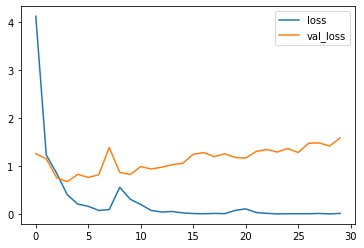

In [0]:
plt.plot(r_new.history['loss'],label='loss')
plt.plot(r_new.history['val_loss'],label='val_loss')
plt.legend();

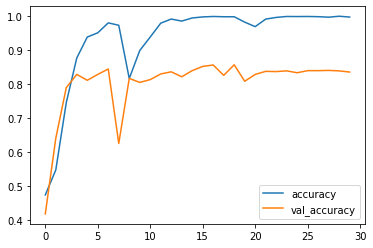

In [0]:
plt.plot(r_new.history['accuracy'],label='accuracy')
plt.plot(r_new.history['val_accuracy'],label='val_accuracy')
plt.legend();

### More Complex CNN model

It seems that in order to increase the level of validation accuracy, we need more complicated model 

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

# Adding Layers
model3=Sequential()
model3.add(Input(shape=x_new_train[0].shape))
model3.add(Conv2D(filters=32,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=64,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=128,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=256,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=512,kernel_size=3,strides=2,activation='relu',padding='same'))

model3.add(Flatten())
model3.add(Dropout(0.2,seed=42))
model3.add(Dense(256,activation='relu'))
model3.add(Dropout(0.2,seed=42))

model3.add(Dense(4,activation='softmax'))

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Adding early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

# Modifying learning rate when the validation accuracy reaches a plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=3,verbose=1)

# Adding checkpoint to save the best model after early stopping
checkpoint=tf.keras.callbacks.ModelCheckpoint('best_model_accuracy.h5',monitor='val_accuracy',save_best_only=True)

#fitting the model
r_new_3 = model3.fit(x_new_train, y_new_train, validation_data=(x_new_val, y_new_val), epochs=30,callbacks=[early_stopping,checkpoint,reduce_lr])

Train on 10086 samples, validate on 1441 samples
Epoch 1/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.9514 - accuracy: 0.5927 - val_loss: 0.4109 - val_accuracy: 0.8536
Epoch 2/30
10086/10086 [==============================] - 344s 34ms/sample - loss: 0.4068 - accuracy: 0.8531 - val_loss: 0.2784 - val_accuracy: 0.9105
Epoch 3/30
10086/10086 [==============================] - 343s 34ms/sample - loss: 0.2968 - accuracy: 0.8929 - val_loss: 0.2296 - val_accuracy: 0.9257
Epoch 4/30
10086/10086 [==============================] - 341s 34ms/sample - loss: 0.2175 - accuracy: 0.9224 - val_loss: 0.2242 - val_accuracy: 0.9216
Epoch 5/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.1781 - accuracy: 0.9367 - val_loss: 0.2070 - val_accuracy: 0.9278
Epoch 6/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.1472 - accuracy: 0.9483 - val_loss: 0.2098 - val_accuracy: 0.9382
Epoch 7/30
10086/10086 [=====================

In [0]:
model3.evaluate(x_new_val,y_new_val)

1441/1441 [==============================] - 14s 9ms/sample - loss: 0.2670 - accuracy: 0.9452


[0.2670340282761083, 0.94517696]

In [0]:
#Loading the epoch with the best accuracy
model3=tf.keras.models.load_model('best_model_accuracy.h5')

In [0]:
model3.save('best_model_accuracy.h5')

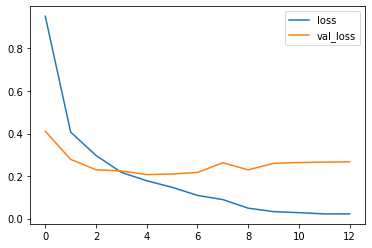

In [0]:
plt.plot(r_new_3.history['loss'],label='loss')
plt.plot(r_new_3.history['val_loss'],label='val_loss')
plt.legend();

In [0]:
pd.DataFrame({'epoch':list(range(1,14)),
              'learning_rate':r_new_3.history['lr'],
              'train_loss':r_new_3.history['loss'],
              'val_loss':r_new_3.history['val_loss'],
              'train_accuracy':r_new_3.history['accuracy'],
              'test_accuracy':r_new_3.history['val_accuracy']}).to_csv('metrics.csv',index=False)

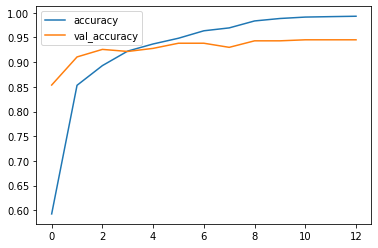

In [0]:
plt.plot(r_new_3.history['accuracy'],label='accuracy')
plt.plot(r_new_3.history['val_accuracy'],label='val_accuracy')
plt.legend();

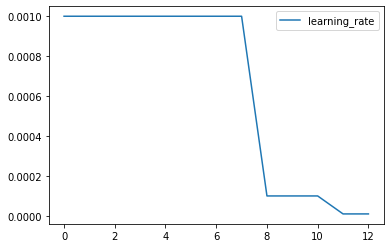

In [0]:
plt.plot(r_new_3.history['lr'],label='learning_rate')
plt.legend();

In [0]:
# The accuracy on the test data
model3.evaluate(x_new_test,y_new_test)

2882/2882 [==============================] - 27s 10ms/sample - loss: 0.3462 - accuracy: 0.9351


[0.34622218791652937, 0.9351145]

In [0]:
tf.math.confusion_matrix(y_new_test,model3.predict_classes(x_new_test))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[612,  20,  15,  33],
       [ 11, 689,   8,  11],
       [ 21,  10, 689,  11],
       [ 30,  10,   7, 705]], dtype=int32)>

Predicted as a/an ring while it is a/an bracelet


(-0.5, 199.5, 199.5, -0.5)

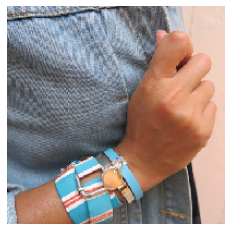

In [0]:
dict1={0: 'bracelet',
       1: 'earring',
       2: 'necklace',
       3: 'ring'}
missclass_index=np.where(y_new_test!=model3.predict_classes(x_new_test))[0]
random_index=np.random.choice(missclass_index)
plt.imshow(x_new_test[random_index].astype(np.float32))
print('Predicted as a/an {} while it is a/an {}'.format(dict1[model3.predict_classes(x_new_test)[random_index]],dict1[y_new_test[random_index]]))
plt.axis('off')

## Unsupervised Deep Clustering with Autoencoders and Kmeans and Hierarchical Methods

In this section, my goal is to try to cluster images within each of the four jewelry types. At first, a baseline clustering kmeans model is developed without the help of deep learning to find the silhouette score to compare the more advanced deept learning ones with it.

In [5]:
# Downloading data and converting the path string to Path
# If you received 403 Forbidden error, please start the download manually using download manager manually and immediately cancel that and run this cell again.
large_data_dir=tf.keras.utils.get_file(origin='http://up.iranblog.com/uploads/Jewellery_8c345.zip',
                        fname='jewellery',
                        extract=True)
large_data_dir = pathlib.Path(large_data_dir)

6414336/6412163 [==============================] - 0s 0us/step


In [6]:
class_names = np.array([item.name for item in sorted(large_data_dir.parent.glob('Jewellery/*'))])
class_names

array(['bracelet', 'earring', 'necklace', 'ring'], dtype='<U8')

In [7]:
# Counting each category images
bracelet_image_count = len(list(large_data_dir.parent.glob('Jewellery/bracelet/*.jpg')))
print('bracelet images count:',bracelet_image_count)
earring_image_count = len(list(large_data_dir.parent.glob('Jewellery/earring/*.jpg')))
print('earring images count:',earring_image_count)
necklace_image_count = len(list(large_data_dir.parent.glob('Jewellery/necklace/*.jpg')))
print('necklace images count:',necklace_image_count)
ring_image_count = len(list(large_data_dir.parent.glob('Jewellery/ring/*.jpg')))
print('ring images count:',ring_image_count)


bracelet images count: 309
earring images count: 472
necklace images count: 301
ring images count: 188


In [0]:
# Loading bracelet images
x_bracelet=np.empty(shape=(bracelet_image_count,200,200,3),dtype=np.float32)
counter=0
for i in (sorted(large_data_dir.parent.glob('Jewellery/bracelet/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  x_bracelet[counter]=b
  counter+=1

In [9]:
x_bracelet.shape

(309, 200, 200, 3)

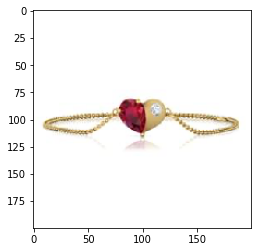

In [10]:
plt.imshow(x_bracelet[0])

In [0]:
# Loading earring images
x_earring=np.empty(shape=(earring_image_count,200,200,3),dtype=np.float32)
counter=0
for i in (sorted(large_data_dir.parent.glob('Jewellery/earring/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  x_earring[counter]=b
  counter+=1

In [12]:
x_earring.shape

(472, 200, 200, 3)

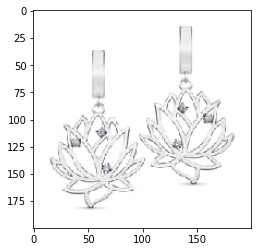

In [13]:
plt.imshow(x_earring[0])

In [0]:
# Loading necklace images
x_necklace=np.empty(shape=(necklace_image_count,200,200,3),dtype=np.float32)
counter=0
for i in (sorted(large_data_dir.parent.glob('Jewellery/necklace/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  x_necklace[counter]=b
  counter+=1

In [15]:
x_necklace.shape

(301, 200, 200, 3)

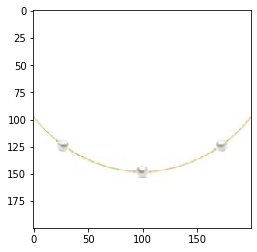

In [16]:
plt.imshow(x_necklace[0])

In [0]:
# Loading ring images
x_ring=np.empty(shape=(ring_image_count,200,200,3),dtype=np.float32)
counter=0
for i in (sorted(large_data_dir.parent.glob('Jewellery/ring/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  x_ring[counter]=b
  counter+=1

In [18]:
x_ring.shape

(188, 200, 200, 3)

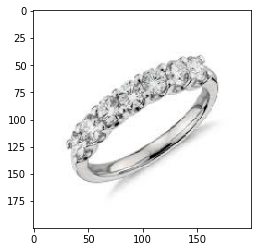

In [19]:
plt.imshow(x_ring[0].astype(np.float32))


### Baseline Kmeans and Hierarchical Clustering Model

#### Bracelet

In [0]:
x_bracelet=x_bracelet.reshape(x_bracelet.shape[0], -1)

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_bracelet_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_bracelet_cluster_model.fit(x_bracelet)
  inertia[i]=base_bracelet_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_bracelet,base_bracelet_cluster_model.labels_,metric='euclidean')
  

Text(0, 0.5, 'Inertia')

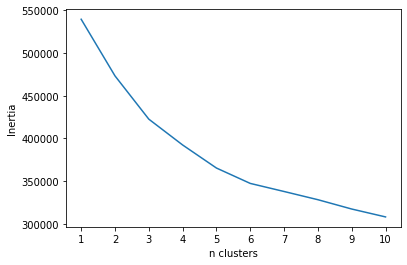

In [0]:
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.xticks(list(inertia.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

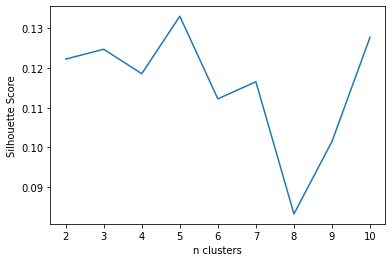

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

The results don't have a high quality in silhouette score. Therefore, we first try dimension reduction with PCA

In [0]:
x_bracelet.shape

(309, 120000)

In [0]:
bracelet_pca=PCA()
bracelet_pca.fit(x_bracelet)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
len(bracelet_pca.explained_variance_ratio_)

309

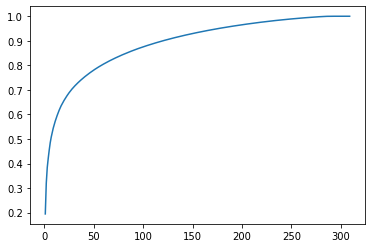

In [0]:
plt.plot(range(1,310),np.cumsum(bracelet_pca.explained_variance_ratio_))


In [0]:
bracelet_pca=PCA(n_components=0.95)
bracelet_pca.fit(x_bracelet)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
bracelet_pca.n_components_

177

In [0]:
x_bracelet_pca=bracelet_pca.transform(x_bracelet)

In [0]:
x_bracelet_pca.shape

(309, 177)

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_bracelet_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_bracelet_cluster_model.fit(x_bracelet_pca)
  inertia[i]=base_bracelet_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_bracelet_pca,base_bracelet_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Inertia')

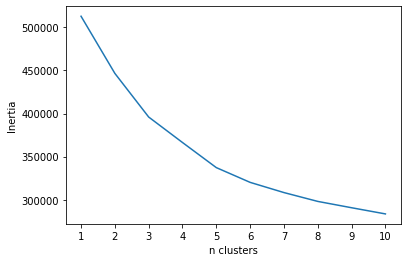

In [0]:
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.xticks(list(inertia.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

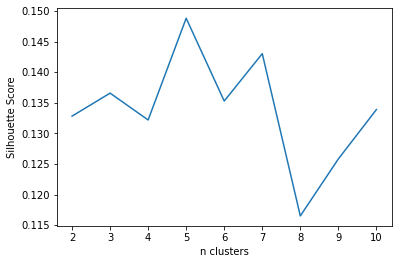

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

A little improvement, but not that much. Let's try hierarchical clustering without and with PCA

In [0]:
# Without PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_bracelet_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  base_bracelet_cluster_model.fit(x_bracelet)
  sil_score[i]=silhouette_score(x_bracelet,base_bracelet_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

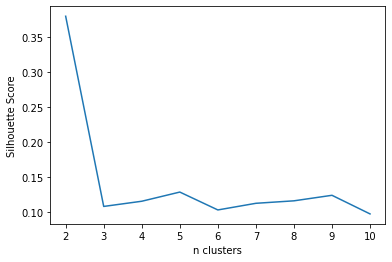

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
# With PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_bracelet_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  base_bracelet_cluster_model.fit(x_bracelet_pca)
  sil_score[i]=silhouette_score(x_bracelet_pca,base_bracelet_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

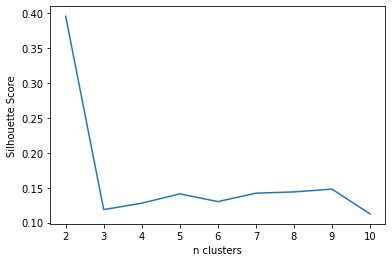

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

The higherarchical model with PCA has better performance. Therefore, we use 2 clusters and finalize our baseline model

In [0]:
base_bracelet_cluster_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
base_bracelet_cluster_model.fit(x_bracelet_pca)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [0]:
np.unique(base_bracelet_cluster_model.labels_,return_counts=True)

(array([0, 1]), array([287,  22]))

In [0]:
np.where(base_bracelet_cluster_model.labels_==0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  17,  18,  19,  21,  23,  24,  25,  26,  27,  28,
         29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,  43,
         44,  46,  47,  49,  50,  52,  54,  55,  56,  57,  58,  59,  60,
         61,  63,  64,  65,  66,  68,  70,  71,  74,  75,  76,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  90,  92,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196

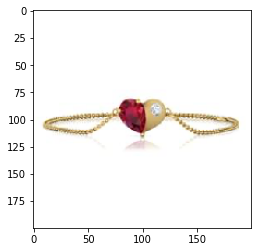

In [0]:
plt.imshow(x_bracelet.reshape(x_bracelet.shape[0],200,200,-1)[0].astype(np.float32))

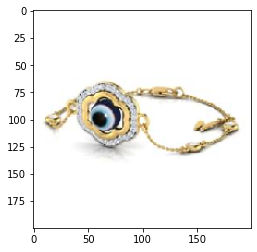

In [0]:
plt.imshow(x_bracelet.reshape(x_bracelet.shape[0],200,200,-1)[38].astype(np.float32))

In [0]:
np.where(base_bracelet_cluster_model.labels_==1)

(array([ 16,  20,  22,  31,  40,  45,  48,  51,  53,  62,  67,  69,  72,
         73,  77,  78,  89,  91,  93, 217, 307, 308]),)

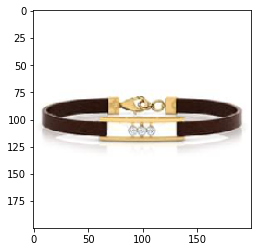

In [0]:
plt.imshow(x_bracelet.reshape(x_bracelet.shape[0],200,200,-1)[16].astype(np.float32))

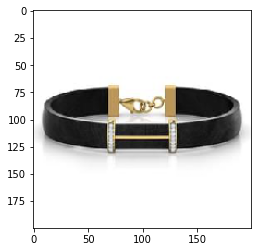

In [0]:
plt.imshow(x_bracelet.reshape(x_bracelet.shape[0],200,200,-1)[31].astype(np.float32))

#### Earrings

Based on what we have seen for the bracelet, from now on, we try the higherarchical clustering first and if it doesn't work, we try to use kmeans.

In [0]:
x_earring=x_earring.reshape(x_earring.shape[0],-1)

In [0]:
x_earring.shape

(472, 120000)

In [0]:
earring_pca=PCA()
earring_pca.fit(x_earring)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

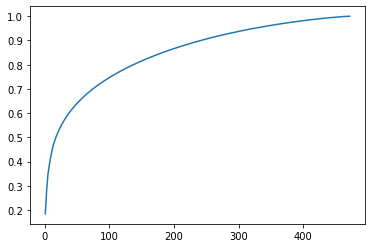

In [0]:
plt.plot(range(1,473),np.cumsum(earring_pca.explained_variance_ratio_))


In [0]:
earring_pca=PCA(n_components=0.95)
earring_pca.fit(x_earring)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
earring_pca.n_components_

324

In [0]:
x_earring_pca=earring_pca.transform(x_earring)

In [0]:
# Without PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_earring_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  base_earring_cluster_model.fit(x_earring)
  sil_score[i]=silhouette_score(x_earing,base_earring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

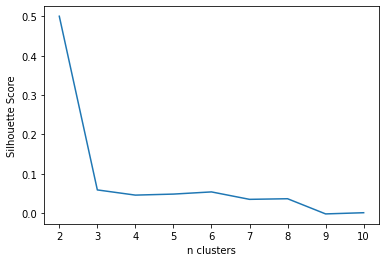

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
# With PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_earring_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  base_earring_cluster_model.fit(x_earring_pca)
  sil_score[i]=silhouette_score(x_earing_pca,base_earring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

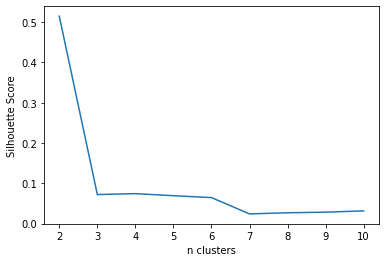

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

Based on the above result, the pca version is better, therefore we select this model with n_cluster=2

In [0]:
base_earring_cluster_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
base_earring_cluster_model.fit(x_earring_pca)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [0]:
np.unique(base_earring_cluster_model.labels_,return_counts=True)

(array([0, 1]), array([460,  12]))

In [0]:
np.where(base_earring_cluster_model.labels_==0)[0][:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

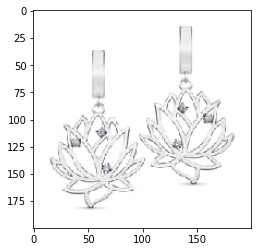

In [0]:
plt.imshow(x_earring.reshape(x_earring.shape[0],200,200,-1)[0])

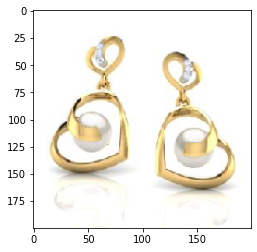

In [0]:
plt.imshow(x_earring.reshape(x_earring.shape[0],200,200,-1)[19])

In [0]:
np.where(base_earring_cluster_model.labels_==1)[0]

array([ 73,  76,  77, 170, 179, 183, 266, 277, 375, 465, 466, 467])

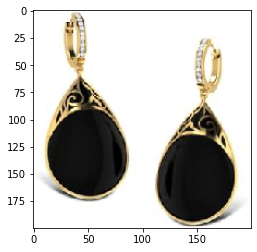

In [0]:
plt.imshow(x_earring.reshape(x_earring.shape[0],200,200,-1)[73])

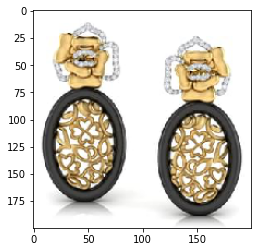

In [0]:
plt.imshow(x_earring.reshape(x_earring.shape[0],200,200,-1)[170])

#### Necklace

In [0]:
x_necklace=x_necklace.reshape(x_necklace.shape[0],-1)

In [0]:
x_necklace.shape

(301, 120000)

In [0]:
necklace_pca=PCA()
necklace_pca.fit(x_necklace)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

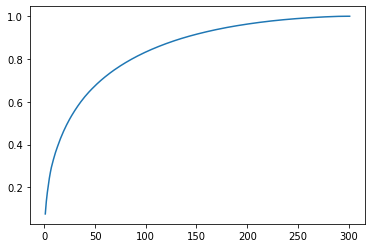

In [0]:
plt.plot(range(1,302),np.cumsum(necklace_pca.explained_variance_ratio_))


In [0]:
necklace_pca=PCA(n_components=0.95)
x_necklace_pca=necklace_pca.fit_transform(x_necklace)

In [0]:
necklace_pca.n_components_

183

In [0]:
# Without PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_necklace_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='single')
  base_necklace_cluster_model.fit(x_necklace)
  sil_score[i]=silhouette_score(x_necklace,base_necklace_cluster_model.labels_,metric='l2')

Text(0, 0.5, 'Silhouette Score')

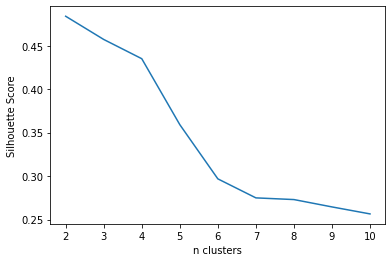

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
# With PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_necklace_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='single')
  base_necklace_cluster_model.fit(x_necklace_pca)
  sil_score[i]=silhouette_score(x_necklace_pca,base_necklace_cluster_model.labels_,metric='l2')

Text(0, 0.5, 'Silhouette Score')

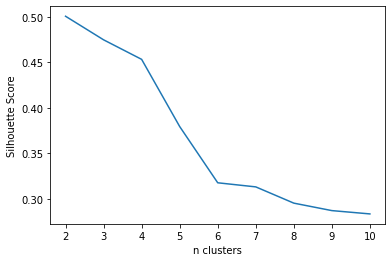

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
base_necklace_cluster_model=AgglomerativeClustering(n_clusters=2,affinity='l2',linkage='single')
base_necklace_cluster_model.fit(x_necklace_pca)


AgglomerativeClustering(affinity='l2', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [0]:
np.unique(base_necklace_cluster_model.labels_,return_counts=True)

(array([0, 1]), array([  2, 299]))

It seems that the baseline model for necklace is not successful in recognizing different clusters within this category. We Will switch to Kmeans to see whether we can get more reasonable result. Moreover, We will see whether we can improve this model in the deep clustering section or not.

In [0]:
np.where(base_necklace_cluster_model.labels_==0)[0]

array([14, 15])

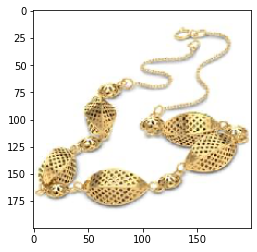

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[14])

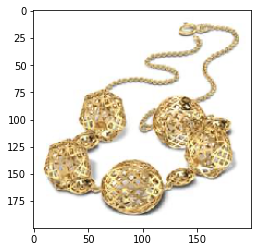

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[15])

In [0]:
np.where(base_necklace_cluster_model.labels_==1)[0][:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 18,
       19, 20, 21])

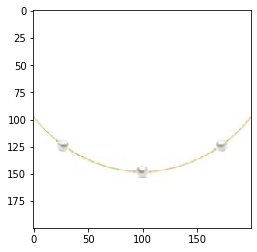

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[0])

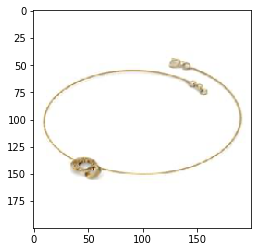

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[20])

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_necklace_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_necklace_cluster_model.fit(x_necklace)
  inertia[i]=base_necklace_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_necklace,base_necklace_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

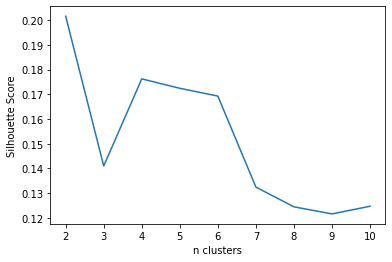

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_necklace_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_necklace_cluster_model.fit(x_necklace_pca)
  inertia[i]=base_necklace_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_necklace_pca,base_necklace_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

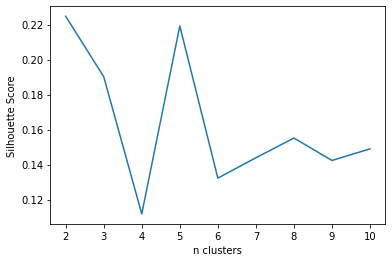

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
base_necklace_cluster_model=KMeans(n_clusters=2,random_state=42)
base_necklace_cluster_model.fit(x_necklace_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
np.unique(base_necklace_cluster_model.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([254,  47]))

In [0]:
np.where(base_necklace_cluster_model.labels_==0)[0][:20]

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 16, 17, 18, 19, 20,
       21, 22, 23])

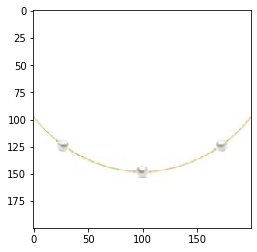

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[0])

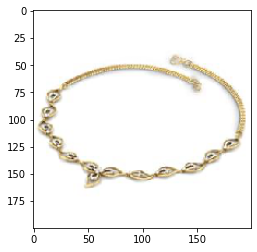

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[1])

In [0]:
np.where(base_necklace_cluster_model.labels_==1)[0][:20]

array([  3,  13,  14,  15,  77,  98, 160, 162, 168, 174, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 187])

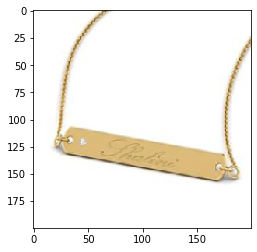

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[3])

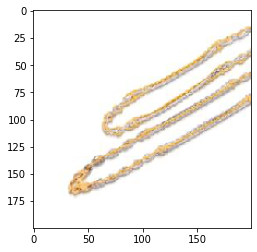

In [0]:
plt.imshow(x_necklace.reshape(x_necklace.shape[0],200,200,-1)[174])

From Above we can see that, although the metric score for Kmeans is lower, but the clusters are more meaningful

#### Ring

In [0]:
x_ring=x_ring.reshape(x_ring.shape[0],-1)

In [0]:
x_ring.shape

(188, 120000)

In [0]:
ring_pca=PCA()
ring_pca.fit(x_ring)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

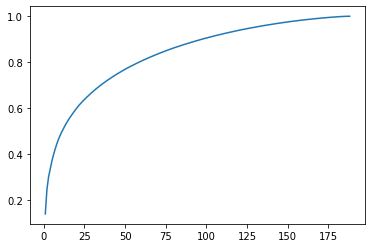

In [0]:
plt.plot(range(1,189),np.cumsum(ring_pca.explained_variance_ratio_))

In [0]:
ring_pca=PCA(n_components=0.95)
x_ring_pca=ring_pca.fit_transform(x_ring)

In [0]:
ring_pca.n_components_

128

In [0]:
# Without PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_ring_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
  base_ring_cluster_model.fit(x_ring)
  sil_score[i]=silhouette_score(x_ring,base_ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

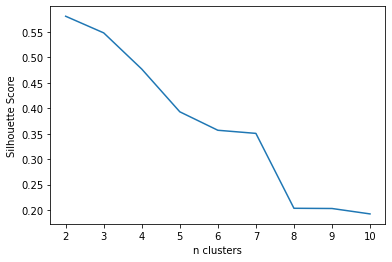

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
# With PCA
inertia={}
sil_score={}
for i in range(2,11):
  base_ring_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
  base_ring_cluster_model.fit(x_ring_pca)
  sil_score[i]=silhouette_score(x_ring_pca,base_ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

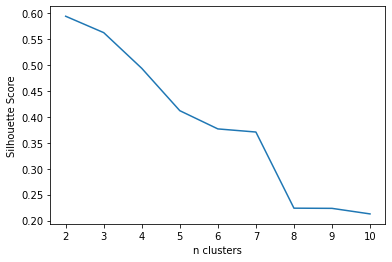

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
base_ring_cluster_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
base_ring_cluster_model.fit(x_ring_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [0]:
np.unique(base_ring_cluster_model.labels_,return_counts=True)

(array([0, 1]), array([  2, 186]))

Again the above result can not have any practical implication. We try Kmeans

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_ring_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_ring_cluster_model.fit(x_ring)
  inertia[i]=base_ring_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_ring,base_ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

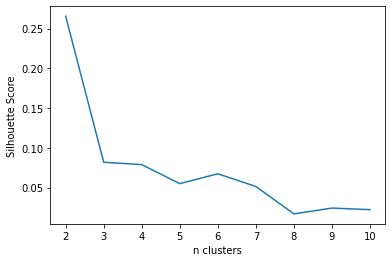

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
inertia={}
sil_score={}
for i in range(1,11):
  base_ring_cluster_model=KMeans(n_clusters=i,random_state=42)
  base_ring_cluster_model.fit(x_ring_pca)
  inertia[i]=base_ring_cluster_model.inertia_
  if i!=1:
    sil_score[i]=silhouette_score(x_ring_pca,base_ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

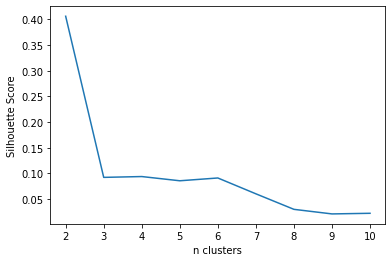

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
base_ring_cluster_model=KMeans(n_clusters=2,random_state=42)
base_ring_cluster_model.fit(x_ring)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
np.unique(base_ring_cluster_model.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([ 31, 157]))

The kmeans model without PCA gives us more reasonable result.

In [0]:
np.where(base_ring_cluster_model.labels_==0)[0]

array([  2,   5,   6,   7,   9,  11,  13,  15,  18,  20,  21,  22,  23,
        24,  26,  27,  28,  29,  30,  33,  34,  37,  38,  39,  41,  43,
        44,  45,  55, 158, 172])

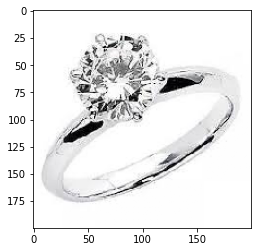

In [0]:
plt.imshow(x_ring.reshape(x_ring.shape[0],200,200,-1)[2])

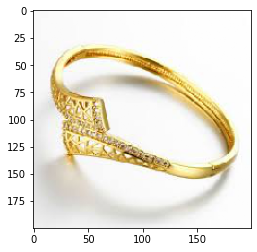

In [0]:
plt.imshow(x_ring.reshape(x_ring.shape[0],200,200,-1)[5])

In [0]:
np.where(base_ring_cluster_model.labels_==1)[0]

array([  0,   1,   3,   4,   8,  10,  12,  14,  16,  17,  19,  25,  31,
        32,  35,  36,  40,  42,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187])

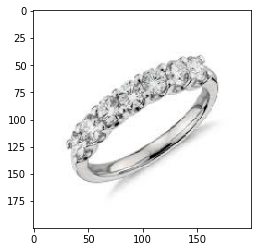

In [0]:
plt.imshow(x_ring.reshape(x_ring.shape[0],200,200,-1)[0])

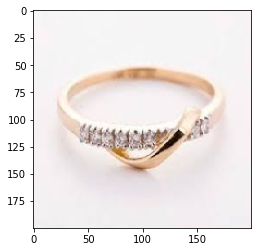

In [0]:
plt.imshow(x_ring.reshape(x_ring.shape[0],200,200,-1)[10])

### Autoencoder Training and Clustering

In this section, we train an autoencoder model which is basically an unsupervised approach and does not need any labels. Autoencoders contain two parts that are encoders and decoders. After training the autoencoder, we use the encoder part only to reduce the dimension of the images and extract usefull patterns. Then, we feed the encoded results to the scikit learn clustering algorithms to see whether the silhoette score is improved or not.

#### Bracelet

In [22]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/unit7_project
!pwd

/content/drive/My Drive/Colab Notebooks/unit7_project
/content/drive/My Drive/Colab Notebooks/unit7_project


In [0]:
np.random.seed(42)
tf.random.set_seed(42)
# this is our input placeholder
input_img = Input(shape=(120000,))

# "encoded" is the encoded representation of the input
encoded = Dense(3000, activation='relu')(input_img)
encoded = Dense(3000, activation='relu')(encoded)
encoded = Dense(8000, activation='relu')(encoded)
encoded = Dense(4)(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(8000, activation='relu')(encoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(120000)(decoded)

# this model maps an input to its reconstruction
bracelet_autoencoder = Model(inputs=input_img, outputs=decoded,name="BraceletAutoEncoder")

In [0]:
bracelet_autoencoder.summary()

Model: "BraceletAutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120000)]          0         
_________________________________________________________________
dense (Dense)                (None, 3000)              360003000 
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              9003000   
_________________________________________________________________
dense_2 (Dense)              (None, 8000)              24008000  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 32004     
_________________________________________________________________
dense_4 (Dense)              (None, 8000)              40000     
_________________________________________________________________
dense_5 (Dense)              (None, 3000)      

In [0]:
x_bracelet=x_bracelet.reshape(x_bracelet.shape[0],-1)

In [40]:
x_bracelet.shape

(309, 120000)

In [0]:
#  this model maps an input to its encoded representation
bracelet_encoder = Model(inputs=input_img, outputs=encoded,name="BraceletEncoder")

In [0]:
bracelet_autoencoder.compile(optimizer='adam', loss='mse')
bracelet_autoencoder.fit(x_bracelet,x_bracelet,epochs=15,verbose=1)

Train on 309 samples
Epoch 1/15
309/309 [==============================] - 10s 31ms/sample - loss: 162.6760
Epoch 2/15
309/309 [==============================] - 7s 23ms/sample - loss: 1.2052
Epoch 3/15
309/309 [==============================] - 7s 22ms/sample - loss: 0.0804
Epoch 4/15
309/309 [==============================] - 7s 23ms/sample - loss: 0.0285
Epoch 5/15
309/309 [==============================] - 7s 23ms/sample - loss: 0.0179
Epoch 6/15
309/309 [==============================] - 7s 22ms/sample - loss: 0.0152
Epoch 7/15
309/309 [==============================] - 7s 22ms/sample - loss: 0.0147
Epoch 8/15
309/309 [==============================] - 7s 22ms/sample - loss: 0.0146
Epoch 9/15
309/309 [==============================] - 7s 24ms/sample - loss: 0.0144
Epoch 10/15
309/309 [==============================] - 8s 24ms/sample - loss: 0.0143
Epoch 11/15
309/309 [==============================] - 8s 24ms/sample - loss: 0.0144
Epoch 12/15
309/309 [=============================

In [0]:
bracelet_autoencoder.save('bracelet_autoencoder.h5')

In [0]:
bracelet_encoder.save('bracelet_encoder.h5')

In [41]:
bracelet_encoder=tf.keras.models.load_model('bracelet_encoder.h5')

In [0]:
x_bracelet_pred=bracelet_encoder.predict(x_bracelet)

In [0]:
inertia={}
sil_score={}
for i in range(2,11):
  bracelet_cluster_model=KMeans(n_clusters=i,random_state=42)
  bracelet_cluster_model.fit(x_bracelet_pred)
  sil_score[i]=silhouette_score(x_bracelet_pred,bracelet_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

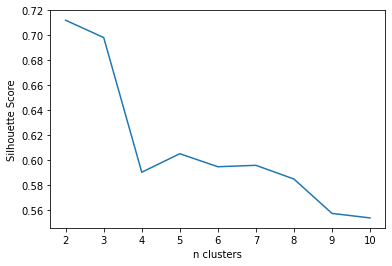

In [44]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [45]:
bracelet_cluster_model=KMeans(n_clusters=2)
bracelet_cluster_model.fit(x_bracelet_pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
np.unique(bracelet_cluster_model.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([251,  58]))

As we can see, the clustering result has improved substantially. The silhoutte score increased from 0.4 to 0.7. Also the ratio between each class seems reasonable.

In [0]:
# Saving the clustering model
pickle.dump(bracelet_cluster_model, open('bracelet_cluster.pkl','wb'))

In [0]:
np.where(bracelet_cluster_model.labels_==0)[0]

array([  0,   1,   2,   3,   5,   6,   8,   9,  10,  11,  13,  14,  15,
        17,  18,  19,  21,  23,  24,  25,  26,  27,  28,  29,  30,  32,
        33,  35,  36,  37,  38,  39,  41,  42,  43,  44,  46,  47,  49,
        50,  52,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,
        66,  68,  70,  71,  74,  75,  76,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  90,  92,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 128, 129,
       133, 134, 135, 136, 138, 139, 142, 144, 145, 147, 148, 150, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 22

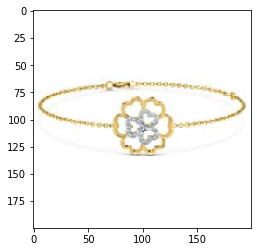

In [0]:
plt.imshow(x_bracelet.reshape(-1,200,200,3)[210])

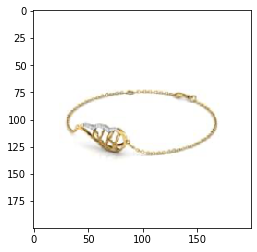

In [0]:
plt.imshow(x_bracelet.reshape(-1,200,200,3)[212])

In [0]:
np.where(bracelet_cluster_model.labels_==1)[0]

array([  4,   7,  12,  16,  20,  22,  31,  34,  40,  45,  48,  51,  53,
        62,  67,  69,  72,  73,  77,  78,  89,  91,  93, 123, 126, 127,
       130, 131, 132, 137, 140, 141, 143, 146, 149, 151, 165, 166, 217,
       218, 221, 222, 224, 228, 230, 233, 234, 245, 250, 266, 268, 269,
       270, 279, 286, 305, 307, 308])

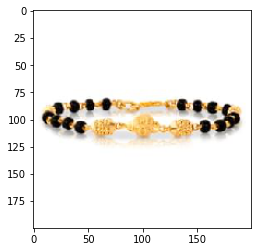

In [0]:
plt.imshow(x_bracelet.reshape(-1,200,200,3)[4])

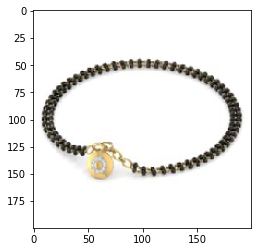

In [0]:
plt.imshow(x_bracelet.reshape(-1,200,200,3)[7])

#### Earrings

In [0]:
np.random.seed(42)
tf.random.set_seed(42)
# this is our input placeholder
input_img = Input(shape=(120000,))

# "encoded" is the encoded representation of the input
encoded = Dense(3000, activation='relu')(input_img)
encoded = Dense(3000, activation='relu')(encoded)
encoded = Dense(8000, activation='relu')(encoded)
encoded = Dense(4)(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(8000, activation='relu')(encoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(120000)(decoded)

# this model maps an input to its reconstruction
earring_autoencoder = Model(inputs=input_img, outputs=decoded,name="EarringAutoEncoder")

In [0]:
x_earring=x_earring.reshape(x_earring.shape[0],-1)

In [21]:
x_earring.shape

(472, 120000)

In [0]:
#  this model maps an input to its encoded representation
earring_encoder = Model(inputs=input_img, outputs=encoded,name="EarringEncoder")

In [0]:
earring_autoencoder.compile(optimizer='adam', loss='mse')
earring_autoencoder.fit(x_earring,x_earring,epochs=15,verbose=1)

In [0]:
earring_encoder.save('earring_encoder.h5')

In [23]:
earring_encoder=tf.keras.models.load_model('earring_encoder.h5')

In [0]:
x_earring_pred=earring_encoder.predict(x_earring)

In [0]:
inertia={}
sil_score={}
for i in range(2,11):
  earring_cluster_model=KMeans(n_clusters=i,random_state=42)
  earring_cluster_model.fit(x_earring_pred)
  sil_score[i]=silhouette_score(x_earring_pred,earring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

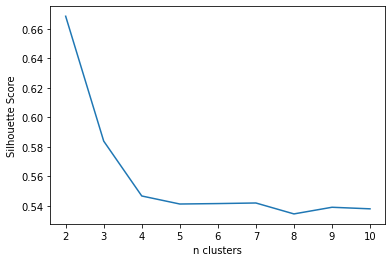

In [28]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [29]:
earring_cluster_model=KMeans(n_clusters=2,random_state=42)
earring_cluster_model.fit(x_earring_pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
np.unique(earring_cluster_model.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([411,  61]))

As we can see, we get an improvement in terms of the metric score and the population size of each cluster

In [0]:
pickle.dump(earring_cluster_model, open('earring_cluster.pkl','wb'))

In [32]:
# The images indexes in cluster zero
np.where(earring_cluster_model.labels_==0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  78,  79,  80,  82,  83,  85,  88,
        89,  90,  91,  92,  93,  94,  95,  97,  98,  99, 100, 101, 102,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130,
       131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 163, 164, 166, 167, 169, 172, 173, 174, 175, 176,
       177, 180, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 207, 20

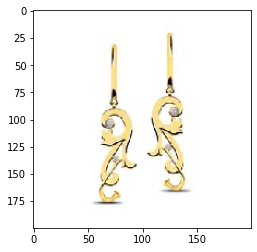

In [33]:
plt.imshow(x_earring.reshape(-1,200,200,3)[23])

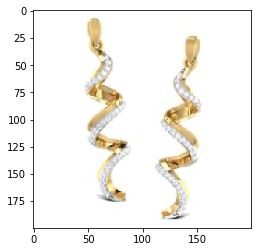

In [34]:
plt.imshow(x_earring.reshape(-1,200,200,3)[25])

In [36]:
# The images indexes in cluster one
np.where(earring_cluster_model.labels_==1)[0]

array([ 24,  54,  73,  74,  75,  76,  77,  81,  84,  86,  87,  96, 103,
       129, 138, 152, 162, 165, 168, 170, 171, 178, 179, 181, 183, 202,
       205, 206, 208, 229, 231, 234, 253, 261, 263, 266, 277, 282, 283,
       286, 290, 300, 302, 314, 330, 356, 360, 375, 380, 415, 423, 424,
       427, 429, 431, 453, 457, 462, 465, 466, 467])

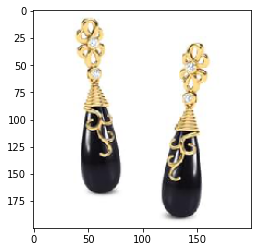

In [37]:
plt.imshow(x_earring.reshape(-1,200,200,3)[24])

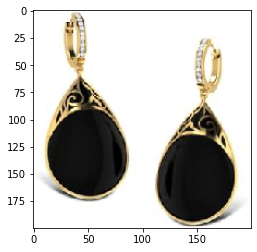

In [38]:
plt.imshow(x_earring.reshape(-1,200,200,3)[73])

#### Necklace

In [0]:
np.random.seed(42)
tf.random.set_seed(42)
# this is our input placeholder
input_img = Input(shape=(120000,))

# "encoded" is the encoded representation of the input
encoded = Dense(3000, activation='relu')(input_img)
encoded = Dense(3000, activation='relu')(encoded)
encoded = Dense(8000, activation='relu')(encoded)
encoded = Dense(4)(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(8000, activation='relu')(encoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(120000)(decoded)

# this model maps an input to its reconstruction
necklace_autoencoder = Model(inputs=input_img, outputs=decoded,name="NecklaceAutoEncoder")

In [0]:
x_necklace=x_necklace.reshape(x_necklace.shape[0],-1)

In [49]:
x_necklace.shape

(301, 120000)

In [0]:
#  this model maps an input to its encoded representation
necklace_encoder = Model(inputs=input_img, outputs=encoded,name="NecklaceEncoder")

In [0]:
necklace_autoencoder.compile(optimizer='adam', loss='mse')
necklace_autoencoder.fit(x_necklace,x_necklace,epochs=12,verbose=1)

Train on 301 samples
Epoch 1/12
301/301 [==============================] - 7s 24ms/sample - loss: 3.5299
Epoch 2/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.1020
Epoch 3/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0161
Epoch 4/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0103
Epoch 5/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0079
Epoch 6/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0073
Epoch 7/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0070
Epoch 8/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0070
Epoch 9/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0069
Epoch 10/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0069
Epoch 11/12
301/301 [==============================] - 7s 22ms/sample - loss: 0.0069
Epoch 12/12
301/301 [==============================] 

In [0]:
necklace_encoder.save('necklace_encoder.h5')

In [50]:
necklace_encoder=tf.keras.models.load_model('necklace_encoder.h5')

In [0]:
x_necklace_pred=necklace_encoder.predict(x_necklace)

In [0]:
inertia={}
sil_score={}
for i in range(2,11):
  necklace_cluster_model=KMeans(n_clusters=i,random_state=42)
  necklace_cluster_model.fit(x_necklace_pred)
  sil_score[i]=silhouette_score(x_necklace_pred,necklace_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

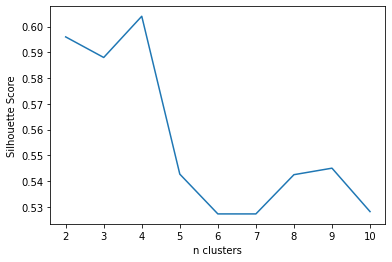

In [53]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [54]:
necklace_cluster_model=KMeans(n_clusters=4,random_state=42)
necklace_cluster_model.fit(x_necklace_pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [55]:
np.unique(necklace_cluster_model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([147,  47, 103,   4]))

Compared with the baseline model, we can see that we have a good improvement both in the metric and the cluster sizes

In [0]:
pickle.dump(necklace_cluster_model, open('necklace_cluster.pkl','wb'))

In [57]:
# The images indexes in cluster zero
np.where(necklace_cluster_model.labels_==0)[0]

array([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  18,  20,
        21,  22,  23,  24,  25,  26,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  67,  68,  72,  73,  74,  75,  76,  78,  79,  81,  82,  84,
        85,  86,  87,  88,  91,  94,  95,  96,  99, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 115, 117, 119, 120, 122,
       123, 127, 131, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 152, 153, 154, 155, 156, 159, 164, 169, 173,
       175, 186, 206, 209, 217, 220, 230, 231, 232, 233, 234, 240, 241,
       249, 250, 251, 252, 253, 254, 255, 261, 272, 277, 278, 279, 280,
       283, 284, 299, 300])

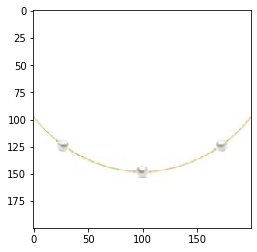

In [58]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[0])

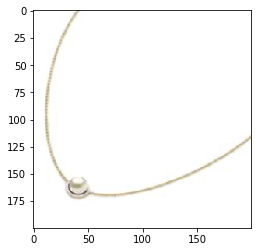

In [59]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[2])

In [60]:
# The images indexes in cluster one
np.where(necklace_cluster_model.labels_==1)[0]

array([  3,  27,  63,  71,  77,  89,  97, 108, 118, 128, 129, 132, 160,
       162, 168, 174, 179, 182, 185, 188, 193, 194, 195, 196, 197, 199,
       205, 211, 216, 222, 226, 235, 258, 270, 271, 273, 281, 285, 286,
       287, 289, 290, 293, 294, 295, 296, 297])

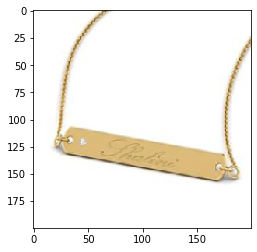

In [61]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[3])

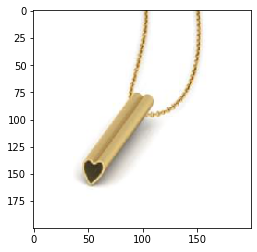

In [62]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[27])

In [63]:
# The images indexes in cluster two
np.where(necklace_cluster_model.labels_==2)[0]

array([  1,  16,  17,  19,  53,  64,  65,  66,  69,  70,  80,  83,  90,
        92,  93, 100, 114, 116, 121, 124, 125, 126, 130, 133, 134, 135,
       136, 151, 157, 158, 161, 163, 165, 166, 167, 170, 171, 172, 176,
       177, 178, 180, 181, 183, 184, 187, 189, 190, 191, 192, 198, 200,
       201, 202, 203, 204, 207, 208, 210, 212, 213, 214, 215, 218, 219,
       221, 223, 224, 225, 227, 228, 229, 236, 237, 238, 239, 242, 243,
       244, 245, 246, 247, 248, 256, 257, 259, 260, 262, 263, 264, 265,
       266, 267, 268, 269, 274, 275, 276, 282, 288, 291, 292, 298])

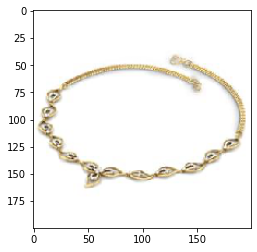

In [64]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[1])

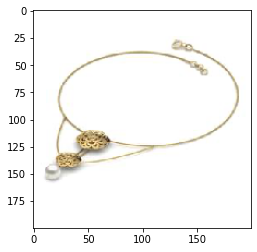

In [65]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[16])

In [66]:
# The images indexes in cluster three
np.where(necklace_cluster_model.labels_==3)[0]

array([13, 14, 15, 98])

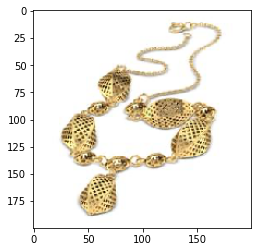

In [67]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[13])

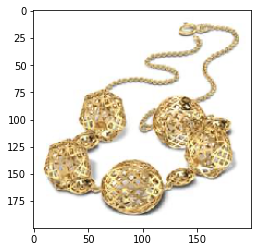

In [68]:
plt.imshow(x_necklace.reshape(-1,200,200,3)[15])

#### Ring

In [0]:
np.random.seed(42)
tf.random.set_seed(42)
# this is our input placeholder
input_img = Input(shape=(120000,))

# "encoded" is the encoded representation of the input
encoded = Dense(3000, activation='relu')(input_img)
encoded = Dense(3000, activation='relu')(encoded)
encoded = Dense(8000, activation='relu')(encoded)
encoded = Dense(8)(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(8000, activation='relu')(encoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(3000, activation='relu')(decoded)
decoded = Dense(120000)(decoded)

# this model maps an input to its reconstruction
ring_autoencoder = Model(inputs=input_img, outputs=decoded,name="RingAutoEncoder")

In [0]:
x_ring=x_ring.reshape(x_ring.shape[0],-1)

In [70]:
x_ring.shape

(188, 120000)

In [0]:
#  this model maps an input to its encoded representation
ring_encoder = Model(inputs=input_img, outputs=encoded,name="RingEncoder")

In [0]:
ring_autoencoder.compile(optimizer='adam', loss='mse')
ring_autoencoder.fit(x_ring,x_ring,epochs=14,verbose=1)

Train on 188 samples
Epoch 1/14
188/188 [==============================] - 5s 27ms/sample - loss: 2382.1784
Epoch 2/14
188/188 [==============================] - 4s 20ms/sample - loss: 8.1467
Epoch 3/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.4392
Epoch 4/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0913
Epoch 5/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0439
Epoch 6/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0288
Epoch 7/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0235
Epoch 8/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0204
Epoch 9/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0196
Epoch 10/14
188/188 [==============================] - 4s 20ms/sample - loss: 0.0192
Epoch 11/14
188/188 [==============================] - 4s 19ms/sample - loss: 0.0190
Epoch 12/14
188/188 [=============================

In [0]:
ring_encoder.save('ring_encoder.h5')

In [71]:
ring_encoder=tf.keras.models.load_model('ring_encoder.h5')

In [0]:
x_ring_pred=ring_encoder.predict(x_ring)

In [0]:
inertia={}
sil_score={}
for i in range(2,11):
  ring_cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  ring_cluster_model.fit(x_ring_pred)
  sil_score[i]=silhouette_score(x_ring_pred,ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

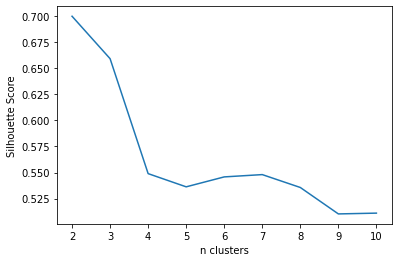

In [0]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [0]:
ring_cluster_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
ring_cluster_model.fit(x_ring_pred)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [0]:
np.unique(ring_cluster_model.labels_,return_counts=True)

(array([0, 1]), array([ 18, 170]))

In [0]:
inertia={}
sil_score={}
for i in range(2,11):
  ring_cluster_model=KMeans(n_clusters=i,random_state=42)
  ring_cluster_model.fit(x_ring_pred)
  sil_score[i]=silhouette_score(x_ring_pred,ring_cluster_model.labels_,metric='euclidean')

Text(0, 0.5, 'Silhouette Score')

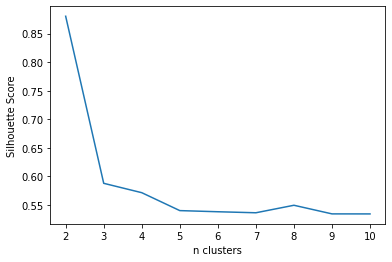

In [74]:
plt.plot(list(sil_score.keys()),list(sil_score.values()))
plt.xticks(list(sil_score.keys()))  
plt.xlabel('n clusters')
plt.ylabel('Silhouette Score')

In [86]:
ring_cluster_model=KMeans(n_clusters=2,random_state=42)
ring_cluster_model.fit(x_ring_pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [87]:
np.unique(ring_cluster_model.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([186,   2]))

As it can be seen, because almost all of the rings go to one cluster, the number of clusters increased from 2 to 3 because it gives us mode meaningful results

In [88]:
ring_cluster_model=KMeans(n_clusters=3,random_state=42)
ring_cluster_model.fit(x_ring_pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [89]:
np.unique(ring_cluster_model.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([125,  61,   2]))

In [0]:
pickle.dump(ring_cluster_model,open('ring_cluster.pkl','wb'))

In [91]:
np.where(ring_cluster_model.labels_==0)[0]

array([  0,   1,   2,   3,   4,  12,  13,  14,  16,  17,  19,  21,  25,
        30,  31,  32,  35,  36,  40,  41,  42,  47,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  66,
        68,  69,  71,  73,  74,  75,  76,  78,  80,  81,  83,  84,  86,
        87,  88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101,
       103, 104, 107, 109, 111, 112, 114, 115, 117, 118, 119, 121, 123,
       124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152,
       153, 155, 157, 160, 161, 162, 164, 165, 167, 168, 170, 171, 173,
       174, 175, 180, 181, 182, 183, 185, 187])

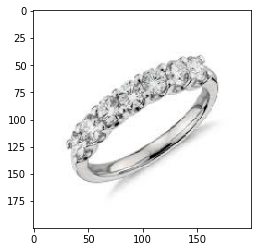

In [92]:
plt.imshow(x_ring.reshape(-1,200,200,3)[0])

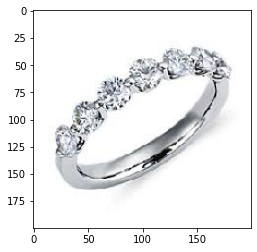

In [80]:
plt.imshow(x_ring.reshape(-1,200,200,3)[1])

In [93]:
np.where(ring_cluster_model.labels_==1)[0]

array([  5,   6,   7,   8,   9,  10,  11,  15,  18,  20,  22,  24,  26,
        27,  28,  29,  33,  34,  37,  38,  39,  43,  44,  46,  48,  65,
        67,  70,  72,  77,  79,  82,  85,  90, 100, 102, 105, 106, 108,
       110, 113, 116, 120, 122, 125, 126, 149, 154, 156, 158, 159, 163,
       166, 169, 172, 176, 177, 178, 179, 184, 186])

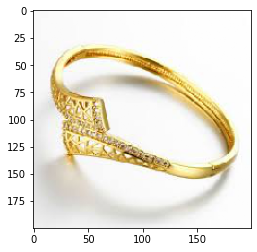

In [94]:
plt.imshow(x_ring.reshape(-1,200,200,3)[5])

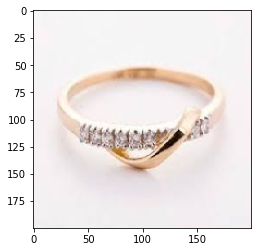

In [99]:
plt.imshow(x_ring.reshape(-1,200,200,3)[10])

In [100]:
np.where(ring_cluster_model.labels_==2)[0]

array([23, 45])

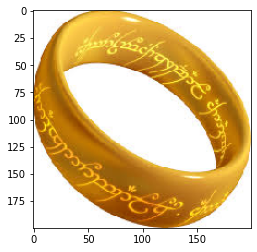

In [101]:
plt.imshow(x_ring.reshape(-1,200,200,3)[23])

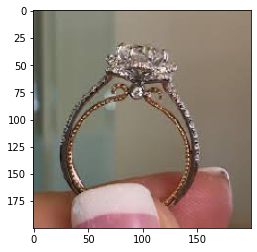

In [102]:
plt.imshow(x_ring.reshape(-1,200,200,3)[45])